# Topic Model For Abstracts

## Prepare data for LDA Analysis

In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from pprint import pprint
#nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [2]:
papers = pd.read_csv('./Dataset_00_02_10_cleaned.csv')
papers.head(5)

,Title,Year,Cited by,Affiliations,Abstract,Author Keywords,Index Keywords,paper_Title_processed,paper_Abstract_processed
0,Connectionism and cognitive architecture: A cr...,1988,1606.0,"CUNY Graduate Center, United States; Universit...",This paper explores differences between Connec...,NaN,article; brain; cognition; human; linguistics;...,connectionism and cognitive architecture a cri...,this paper explores differences between connec...
1,Implicit Learning and Tacit Knowledge,1989,1213.0,"Brooklyn College, the Graduate Center, City Un...","I examine the phenomenon of implicit learning,...",NaN,NaN,implicit learning and tacit knowledge,i examine the phenomenon of implicit learning ...
2,Stable Adaptive Teleoperation,1991,1091.0,"Nonlinear Systems Laboratory, Massachusetts In...","Telerobotics, the body of science and technolo...",NaN,"Control Systems, Cascade; Control Systems, Del...",stable adaptive teleoperation,telerobotics the body of science and technolog...
3,Hippocampal synaptic enhancement and informati...,1987,885.0,"Department of Psychology, University of Colora...",The hypothesis that the physical substrate of ...,NaN,animal experiment; central nervous system; ele...,hippocampal synaptic enhancement and informati...,the hypothesis that the physical substrate of ...
4,Catastrophic Interference in Connectionist Net...,1989,803.0,NaN,Connectionist networks in which information is...,NaN,NaN,catastrophic interference in connectionist net...,connectionist networks in which information is...


In [3]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36303 entries, 0 to 36302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Title                     36303 non-null  object 
 1   Year                      36303 non-null  int64  
 2   Cited by                  27081 non-null  float64
 3   Affiliations              34527 non-null  object 
 4   Abstract                  36303 non-null  object 
 5   Author Keywords           22539 non-null  object 
 6   Index Keywords            16881 non-null  object 
 7   paper_Title_processed     36303 non-null  object 
 8   paper_Abstract_processed  36303 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.5+ MB


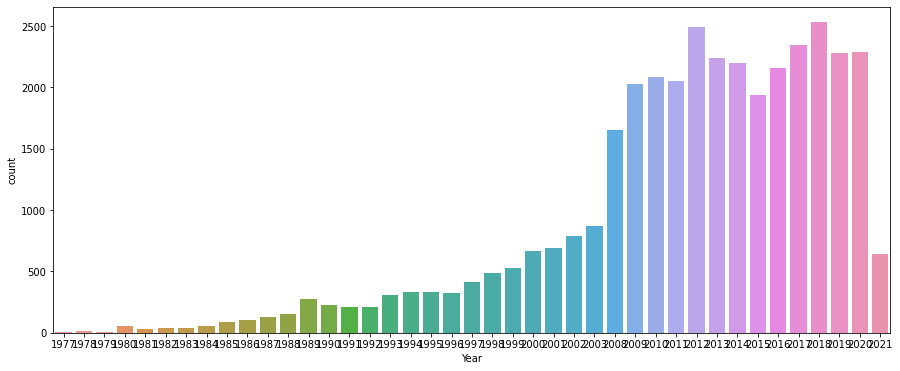

In [4]:
plt.figure(figsize=(15,6))
sns.countplot(x='Year', data=papers);

In [5]:
data = papers.paper_Abstract_processed.values.tolist()

In [6]:
# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=20, threshold=100) 
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [7]:
stop_words = stopwords.words('english')
extension = ['from','subject','edu','re','use', 'high','study','analysis','include','paper','article','make','author','show','present','method','result','reserch','work','effect','model','design','role','main','approach','purpose','implication','finding','methodology','understanding','address','limited','process','case','scenario','provide','application','collect','analyze','amount','share','question','regard','compare','perform','obtain','feature','impact','adoption','implementation','early','improve']
stop_words.extend(extension)

In [8]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [9]:
def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [10]:
data_ready = process_words(data)  

In [11]:
data_ready[0]

['explore',
 'difference',
 'connectionist',
 'proposal',
 'cognitive',
 'architecture',
 'sort',
 'traditionally',
 'assume',
 'cognitive',
 'science',
 'claim',
 'major',
 'distinction',
 'connectionist',
 'classical',
 'architecture',
 'postulate',
 'mental',
 'state',
 'latter',
 'former',
 'committed',
 'symbol',
 'level',
 'representation',
 'language',
 'think',
 'state',
 'combinatorial',
 'syntactic',
 'semantic',
 'structure',
 'several',
 'argument',
 'combinatorial',
 'structure',
 'mental',
 'representation',
 'review',
 'argument',
 'base',
 'systematicity',
 'mental',
 'representation',
 'fact',
 'cognitive',
 'capacity',
 'always',
 'exhibit',
 'certain',
 'symmetry',
 'ability',
 'entertain',
 'give',
 'thought',
 'imply',
 'ability',
 'entertain',
 'thought',
 'semantically',
 'relate',
 'content',
 'claim',
 'argument',
 'powerful',
 'mind',
 'brain',
 'architecture',
 'connectionist',
 'cognitive',
 'level',
 'consider',
 'possibility',
 'connectionism',
 'account',

### Build the Topic Model


In [12]:
import os
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = 'C:/mallet-2.0.8/bin/mallet' # update this path

In [19]:
# display a progress meter
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=50, step=1, cpus=1, random_seed=1):
  models = []
  coherence_scores = []
  for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
    mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path,corpus=corpus, num_topics=topic_nums,
                                                            id2word=dictionary, iterations=500)
      
    cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
                                                                     dictionary=dictionary, coherence='c_v')
      
    coherence_score = cv_coherence_model_mallet_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(mallet_lda_model)
  return models, coherence_scores

## TF Model

In [13]:
# Create Dictionary
id2word_Abstract = corpora.Dictionary(data_ready)
# Create Corpus
texts = data_ready
# Term Document Frequency
bow_corpus_Abstract = [id2word_Abstract.doc2bow(text) for text in texts]
# View
print(bow_corpus_Abstract[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 4), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 5), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 3), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1)]]


### فراوانی کلمات 

In [21]:
dict_corpus = {}

for i in range(len(bow_corpus_Abstract)):
  for idx, freq in bow_corpus_Abstract[i]:
    if id2word_Abstract[idx] in dict_corpus:
      dict_corpus[id2word_Abstract[idx]] += freq
    else:
       dict_corpus[id2word_Abstract[idx]] = freq

In [22]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])
dict_df.sort_values('freq', ascending=False).head(50)

,freq
cognitive,62400
science,48963
research,20562
human,19935
theory,19389
system,18474
base,14460
information,11787
learn,11502
cognition,11445


### یافتن بهترین مدل

In [23]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus_Abstract, texts=data_ready, dictionary=id2word_Abstract,
                                                               start_topic_count=2, end_topic_count=50, step=1, cpus=4)

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [1:34:09<00:00, 115.30s/it]


In [26]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 51, 1), 'Coherence Score': np.round(coherence_scores, 4)})

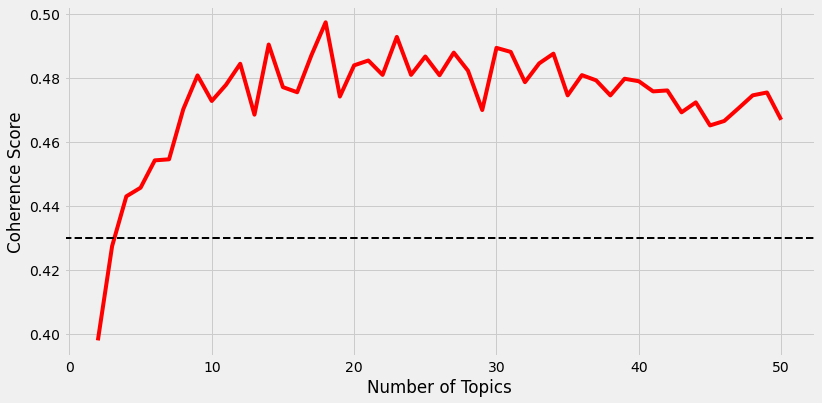

In [27]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


x_ax = range(2, 51, 1)
y_ax = coherence_scores

plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')

plt.axhline(y=0.43, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'

xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

plt.show()

In [28]:
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(60)

,Number of Topics,Coherence Score
16,18,0.4974
21,23,0.4928
12,14,0.4905
28,30,0.4894
29,31,0.4882
25,27,0.4879
32,34,0.4876
15,17,0.4871
23,25,0.4867
19,21,0.4855


## TF-IDF Model

In [29]:
tfidf_Abstract = gensim.models.TfidfModel(bow_corpus_Abstract)
corpus_tfidf_Abstract = tfidf_Abstract[bow_corpus_Abstract]

#for doc in corpus_tfidf_Abstract:
#    pprint(doc)
#    break

### یافتن بهترین مدل 

In [30]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_tfidf_Abstract, texts=data_ready, dictionary=id2word_Abstract,
                                                               start_topic_count=2, end_topic_count=50, step=1, cpus=4)

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\models\wrappers\ldamallet.py:379: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]
100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [31:30<00:00, 38.58s/it]


In [31]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 51, 1), 'Coherence Score': np.round(coherence_scores, 4)})

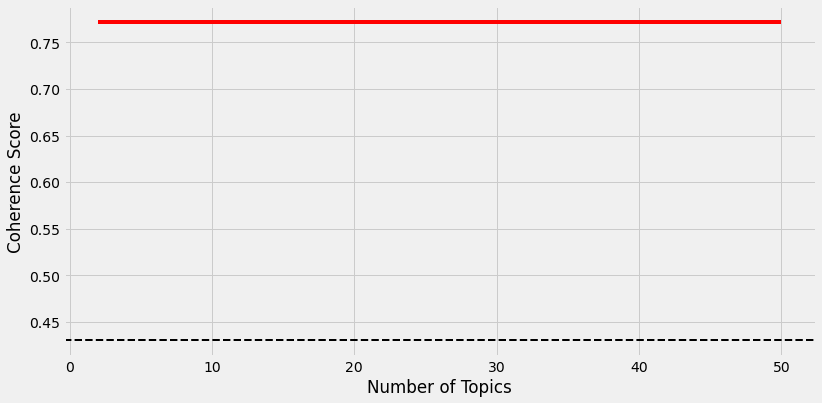

In [32]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


x_ax = range(2, 51, 1)
y_ax = coherence_scores

plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')

plt.axhline(y=0.43, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'

xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

plt.show()

In [33]:
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(60)

,Number of Topics,Coherence Score
0,2,0.7716
25,27,0.7716
27,29,0.7716
28,30,0.7716
29,31,0.7716
30,32,0.7716
31,33,0.7716
32,34,0.7716
33,35,0.7716
34,36,0.7716


## Running LDA using Bag of Words

In [14]:
num_topics = 18
# Build LDA model
lda_model_Abstract_bow =  gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus_Abstract,
                                                           num_topics=num_topics, id2word=id2word_Abstract, random_seed=123)

# Print the Keyword in the 10 topics
pprint(lda_model_Abstract_bow.print_topics())
doc_lda_Abstract_bow = lda_model_Abstract_bow[bow_corpus_Abstract]

[(0,
  '0.085*"system" + 0.073*"human" + 0.031*"computer" + 0.028*"intelligence" + '
  '0.025*"artificial" + 0.023*"agent" + 0.023*"user" + 0.023*"interaction" + '
  '0.015*"environment" + 0.015*"machine"'),
 (1,
  '0.063*"concept" + 0.047*"representation" + 0.044*"theory" + '
  '0.026*"conceptual" + 0.024*"structure" + 0.019*"abstract" + '
  '0.016*"relation" + 0.014*"mental" + 0.013*"logic" + 0.012*"property"'),
 (2,
  '0.067*"problem" + 0.062*"knowledge" + 0.034*"decision" + 0.027*"domain" + '
  '0.021*"reasoning" + 0.020*"solve" + 0.015*"base" + 0.014*"level" + '
  '0.013*"rule" + 0.013*"strategy"'),
 (3,
  '0.032*"task" + 0.026*"visual" + 0.026*"time" + 0.025*"experiment" + '
  '0.020*"object" + 0.017*"attention" + 0.016*"spatial" + 0.013*"response" + '
  '0.013*"perceptual" + 0.013*"face"'),
 (4,
  '0.072*"cognition" + 0.067*"language" + 0.034*"action" + 0.032*"linguistic" '
  '+ 0.026*"cognitive" + 0.024*"body" + 0.024*"embody" + 0.014*"view" + '
  '0.012*"environment" + 0.012*"

## Analyzing LDA model results

### 1. Bag of Words Model

In [18]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_model_Abstract_bow = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model_Abstract_bow)

C:\Users\D.M\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
lda_viz_Abstract_bow = gensimvis.prepare(lda_model_Abstract_bow, bow_corpus_Abstract, id2word_Abstract)
#pyLDAvis.save_html(lda_viz_Abstract_bow, './web/bow_Abstract_'+ str(num_topics) +'.html')
lda_viz_Abstract_bow

C:\Users\D.M\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.134252 -0.131462       1        1  5.962715
13     0.157726 -0.040982       2        1  5.917748
12    -0.140834  0.225374       3        1  5.887930
3      0.230984  0.082088       4        1  5.782705
5      0.229744 -0.026228       5        1  5.694335
8      0.113784 -0.232493       6        1  5.596128
6     -0.238533 -0.027536       7        1  5.562244
17    -0.210652 -0.221101       8        1  5.561033
1     -0.020046  0.163641       9        1  5.531189
14    -0.021920  0.118841      10        1  5.528852
4     -0.112650  0.136320      11        1  5.515374
9      0.145323  0.025403      12        1  5.510849
2      0.112331 -0.037049      13        1  5.493024
11    -0.014632 -0.141138      14        1  5.432411
10     0.164418  0.126780      15        1  5.395327
16    -0.113345  0.153639      16        1  5.273536
15    -0.177292 -0.148360      17        1  5.211089
7     -0.238657 -0.025735      18        1  5.143511, topic_info=           Term          Freq         Total Category  logprob  loglift
13    cognitive  69665.000000  69665.000000  Default  30.0000  30.0000
51      science  54080.000000  54080.000000  Default  29.0000  29.0000
111    research  22066.000000  22066.000000  Default  28.0000  28.0000
153       human  21091.000000  21091.000000  Default  27.0000  27.0000
187      system  19335.000000  19335.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
341       basic    811.875258   2769.396420  Topic18  -5.2786   1.7404
1124    explain    916.742479   4852.714374  Topic18  -5.1571   1.3010
263     propose    866.000275   8210.635248  Topic18  -5.2141   0.7181
30         give    743.091382   4857.132324  Topic18  -5.3671   1.0900
597     society    748.729404   5968.258867  Topic18  -5.3596   0.8916

[1487 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2116     14  1.061360       aaas
1872      4  1.000079        aac
3375     13  0.998305  abduction
1         9  0.847171   abstract
1        11  0.152143   abstract
...     ...       ...        ...
815       8  0.390874       year
815      14  0.032485       year
815      15  0.017431       year
815      16  0.000264       year
8618     16  0.998692      zygon

[2736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 14, 13, 4, 6, 9, 7, 18, 2, 15, 5, 10, 3, 12, 11, 17, 16, 8])

### 2. TF-IDF Model